- Regression Loss Functions
    - Squared Error Loss
    - Absolute Error Loss
    - Huber Loss

- Binary Classification Loss Functions
    - Binary Cross-Entropy
    - Hinge Loss

- Multi-class Classification Loss Functions
    - Multi-class Cross Entropy Loss
    - Kullback Leibler Divergence Loss

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("california_housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
x = df.drop(columns = ["median_house_value"])
y = df["median_house_value"]

In [6]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
sc_xtrain = sc.fit_transform(xtrain)
sc_xtest = sc.fit_transform(xtest)

In [7]:
xtrain.shape

(13600, 8)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(15, activation="relu", input_dim = 8))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1, activation = "linear"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                135       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 306
Trainable params: 306
Non-trainable params: 0
_________________________________________________________________


In [9]:
from keras.optimizers import SGD

In [10]:
model.compile(loss = "mean_absolute_error", optimizer = SGD(),metrics = ["mse"])

In [11]:
history = model.fit(sc_xtrain,ytrain, epochs= 30, batch_size = 20)

Epoch 1/30
680/680 [==============================] - 1s 1ms/step - loss: 162820.7738 - mse: 40797663662.0499
Epoch 2/30
680/680 [==============================] - 1s 1ms/step - loss: 109510.5518 - mse: 21900683351.2129
Epoch 3/30
680/680 [==============================] - 1s 1ms/step - loss: 116822.5494 - mse: 24251419360.7988
Epoch 4/30
680/680 [==============================] - 1s 1ms/step - loss: 107053.1554 - mse: 21238553682.3260: 0s - loss: 106300.0744 - mse: 20
Epoch 5/30
680/680 [==============================] - 1s 960us/step - loss: 97691.2412 - mse: 18133017105.2922
Epoch 6/30
680/680 [==============================] - 1s 1ms/step - loss: 101057.7511 - mse: 18851994663.0954
Epoch 7/30
680/680 [==============================] - 1s 982us/step - loss: 97882.1822 - mse: 19040626475.2305
Epoch 8/30
680/680 [==============================] - 1s 1ms/step - loss: 95387.3938 - mse: 16853319499.5595
Epoch 9/30
680/680 [==============================] - 1s 1ms/step - loss: 92587.8247 

In [12]:
history.history.keys()

dict_keys(['loss', 'mse'])

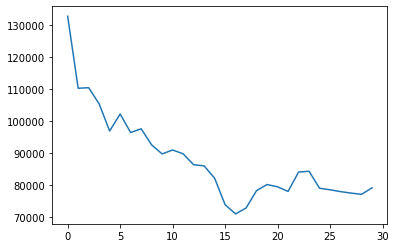

In [13]:
plt.plot(history.history["loss"])

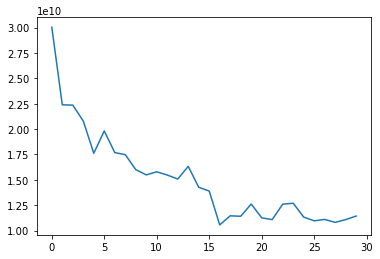

In [14]:
plt.plot(history.history["mse"])

In [15]:
model.evaluate(sc_xtrain, ytrain)

425/425 [==============================] - 1s 907us/step - loss: 72061.6484 - mse: 9554491392.0000


[72061.6484375, 9554491392.0]

In [16]:
model.evaluate(sc_xtest,ytest)

107/107 [==============================] - 0s 2ms/step - loss: 70939.6953 - mse: 9080076288.0000


[70939.6953125, 9080076288.0]

In [17]:
ypred = model.predict(sc_xtest)

In [19]:
pd.DataFrame({"Actual":np.array(ytest).flatten(),"Predicted":ypred.flatten()})

,Actual,Predicted
0,171400.0,253392.921875
1,189600.0,253392.921875
2,500001.0,253392.921875
3,229400.0,253392.921875
4,163400.0,253392.921875
...,...,...
3395,212500.0,253392.921875
3396,210500.0,253392.921875
3397,142900.0,253392.921875
3398,128300.0,128039.093750
